**Importando Bibliotecas**

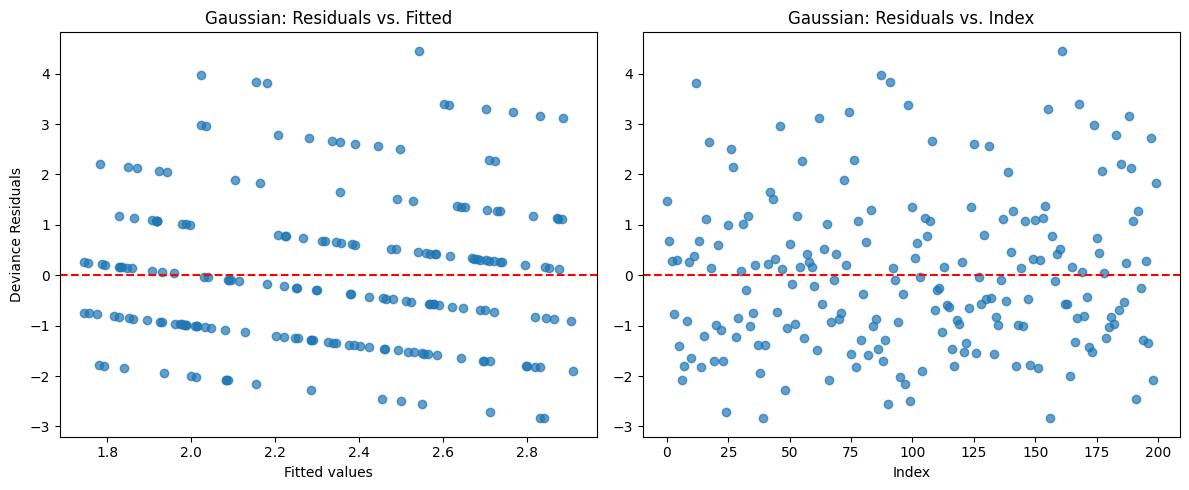

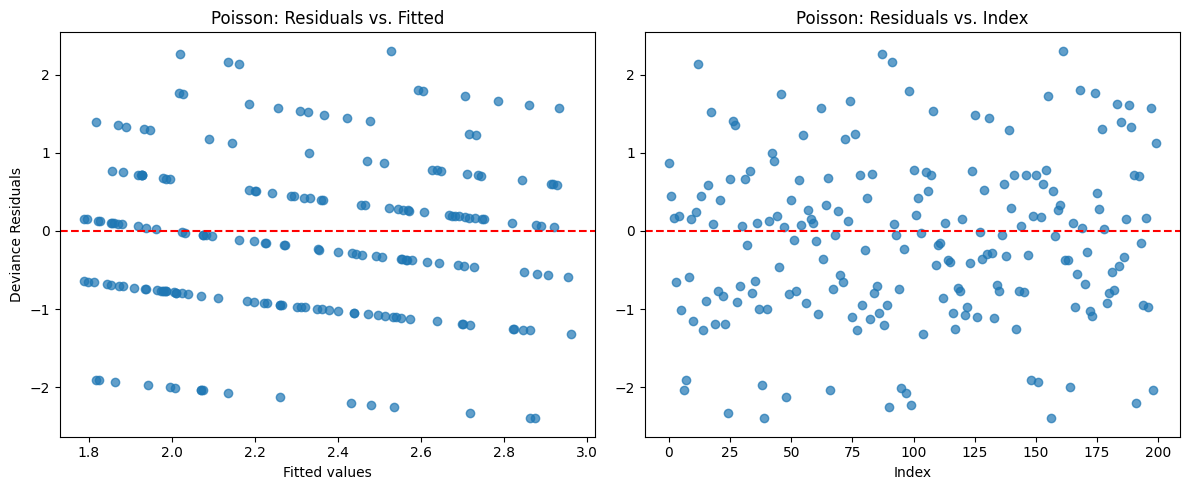

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Gaussian, Poisson

# Generate data
np.random.seed(99)
x = np.random.uniform(0.5, 1.0, 200) # Predictor
y = np.random.poisson(lam=np.exp(x), size=200) # Independent Variable

# Gaussian model
model_norm = sm.GLM(y, sm.add_constant(x), family=Gaussian()).fit()
resid_dev_gauss = model_norm.resid_deviance
fitted_gauss = model_norm.fittedvalues

# Poisson model
glm_poisson = glm('y ~ x', family=Poisson(), data={'x': x, 'y': y}).fit()
resid_dev_poisson = glm_poisson.resid_deviance
fitted_poisson = glm_poisson.fittedvalues

# Plot Gaussian model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(fitted_gauss, resid_dev_gauss, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gaussian: Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Deviance Residuals')

plt.subplot(1, 2, 2)
plt.scatter(range(len(resid_dev_gauss)), resid_dev_gauss, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gaussian: Residuals vs. Index')
plt.xlabel('Index')

plt.tight_layout()
plt.show()

# Plot Poisson model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(fitted_poisson, resid_dev_poisson, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Poisson: Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Deviance Residuals')

plt.subplot(1, 2, 2)
plt.scatter(range(len(resid_dev_poisson)), resid_dev_poisson, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Poisson: Residuals vs. Index')
plt.xlabel('Index')

plt.tight_layout()
plt.show()
